In [1]:
# local
import os
import sys
work_dir = os.path.join('/Volumes/server/Projects/annot-vc')
project_dir = '/Users/jh7685/Documents/Projects/hcp-annot-vc'
cache_path = os.path.join(work_dir, 'hcpannot-cache')
os.environ['HCPANNOT_LOAD_PATH'] = cache_path #os.environ doesnt support path object
image_cache_path = os.path.join(project_dir, 'annot-images')
v123_cache_path  = os.path.join(project_dir,  'annot-v123')
csulc_cache_path = os.path.join(project_dir, 'annot-csulc')

data_path = os.path.join(work_dir, 'data_branch', 'save')
proc_path = os.path.join(work_dir, 'derivatives', 'proc')
fig_dir = os.path.join(work_dir, 'derivatives', 'figures')


In [4]:
from pathlib import Path
sys.path.append('..')
from hcpannot import proc
from visualization import plot_contours as viscontours
import neuropythy as ny
import numpy as np
import itertools
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Terms
 * contours, trace: the raw lines (VO1_VO2) saved in .json file that we drew
 * path: processed contours

In [9]:
researcher_list = ['BrendaQiu',
                  'bogengsong',
                  'JiyeongHa',
                  'lindazelinzhao',
                  'nourahboujaber',
                  'jennifertepan']
roi_list = ['hV4','VO1','VO2']
hemi_list = ['lh','rh']
contour_list = ['hV4', 'hV4_VO1', 'VO1_VO2', 'VO_outer']


# Get raw contour .json files

In [6]:
contours_df = pd.DataFrame({})
for hemi, contour, researcher in itertools.product(hemi_list, contour_list, researcher_list):
    tmp_df = pd.DataFrame({})
    trace_path_list = viscontours.get_contour_list_drawn_by_rater(data_path,
                                                                hemi,
                                                                contour,
                                                                researcher,
                                                                return_full_path=True)
    tmp_df['sid'] = [int(k.split('/')[-2]) for k in trace_path_list]
    tmp_df['researcher'] = researcher
    tmp_df['contour'] = contour
    tmp_df['hemi'] = hemi
    contours_df = contours_df.append(tmp_df)



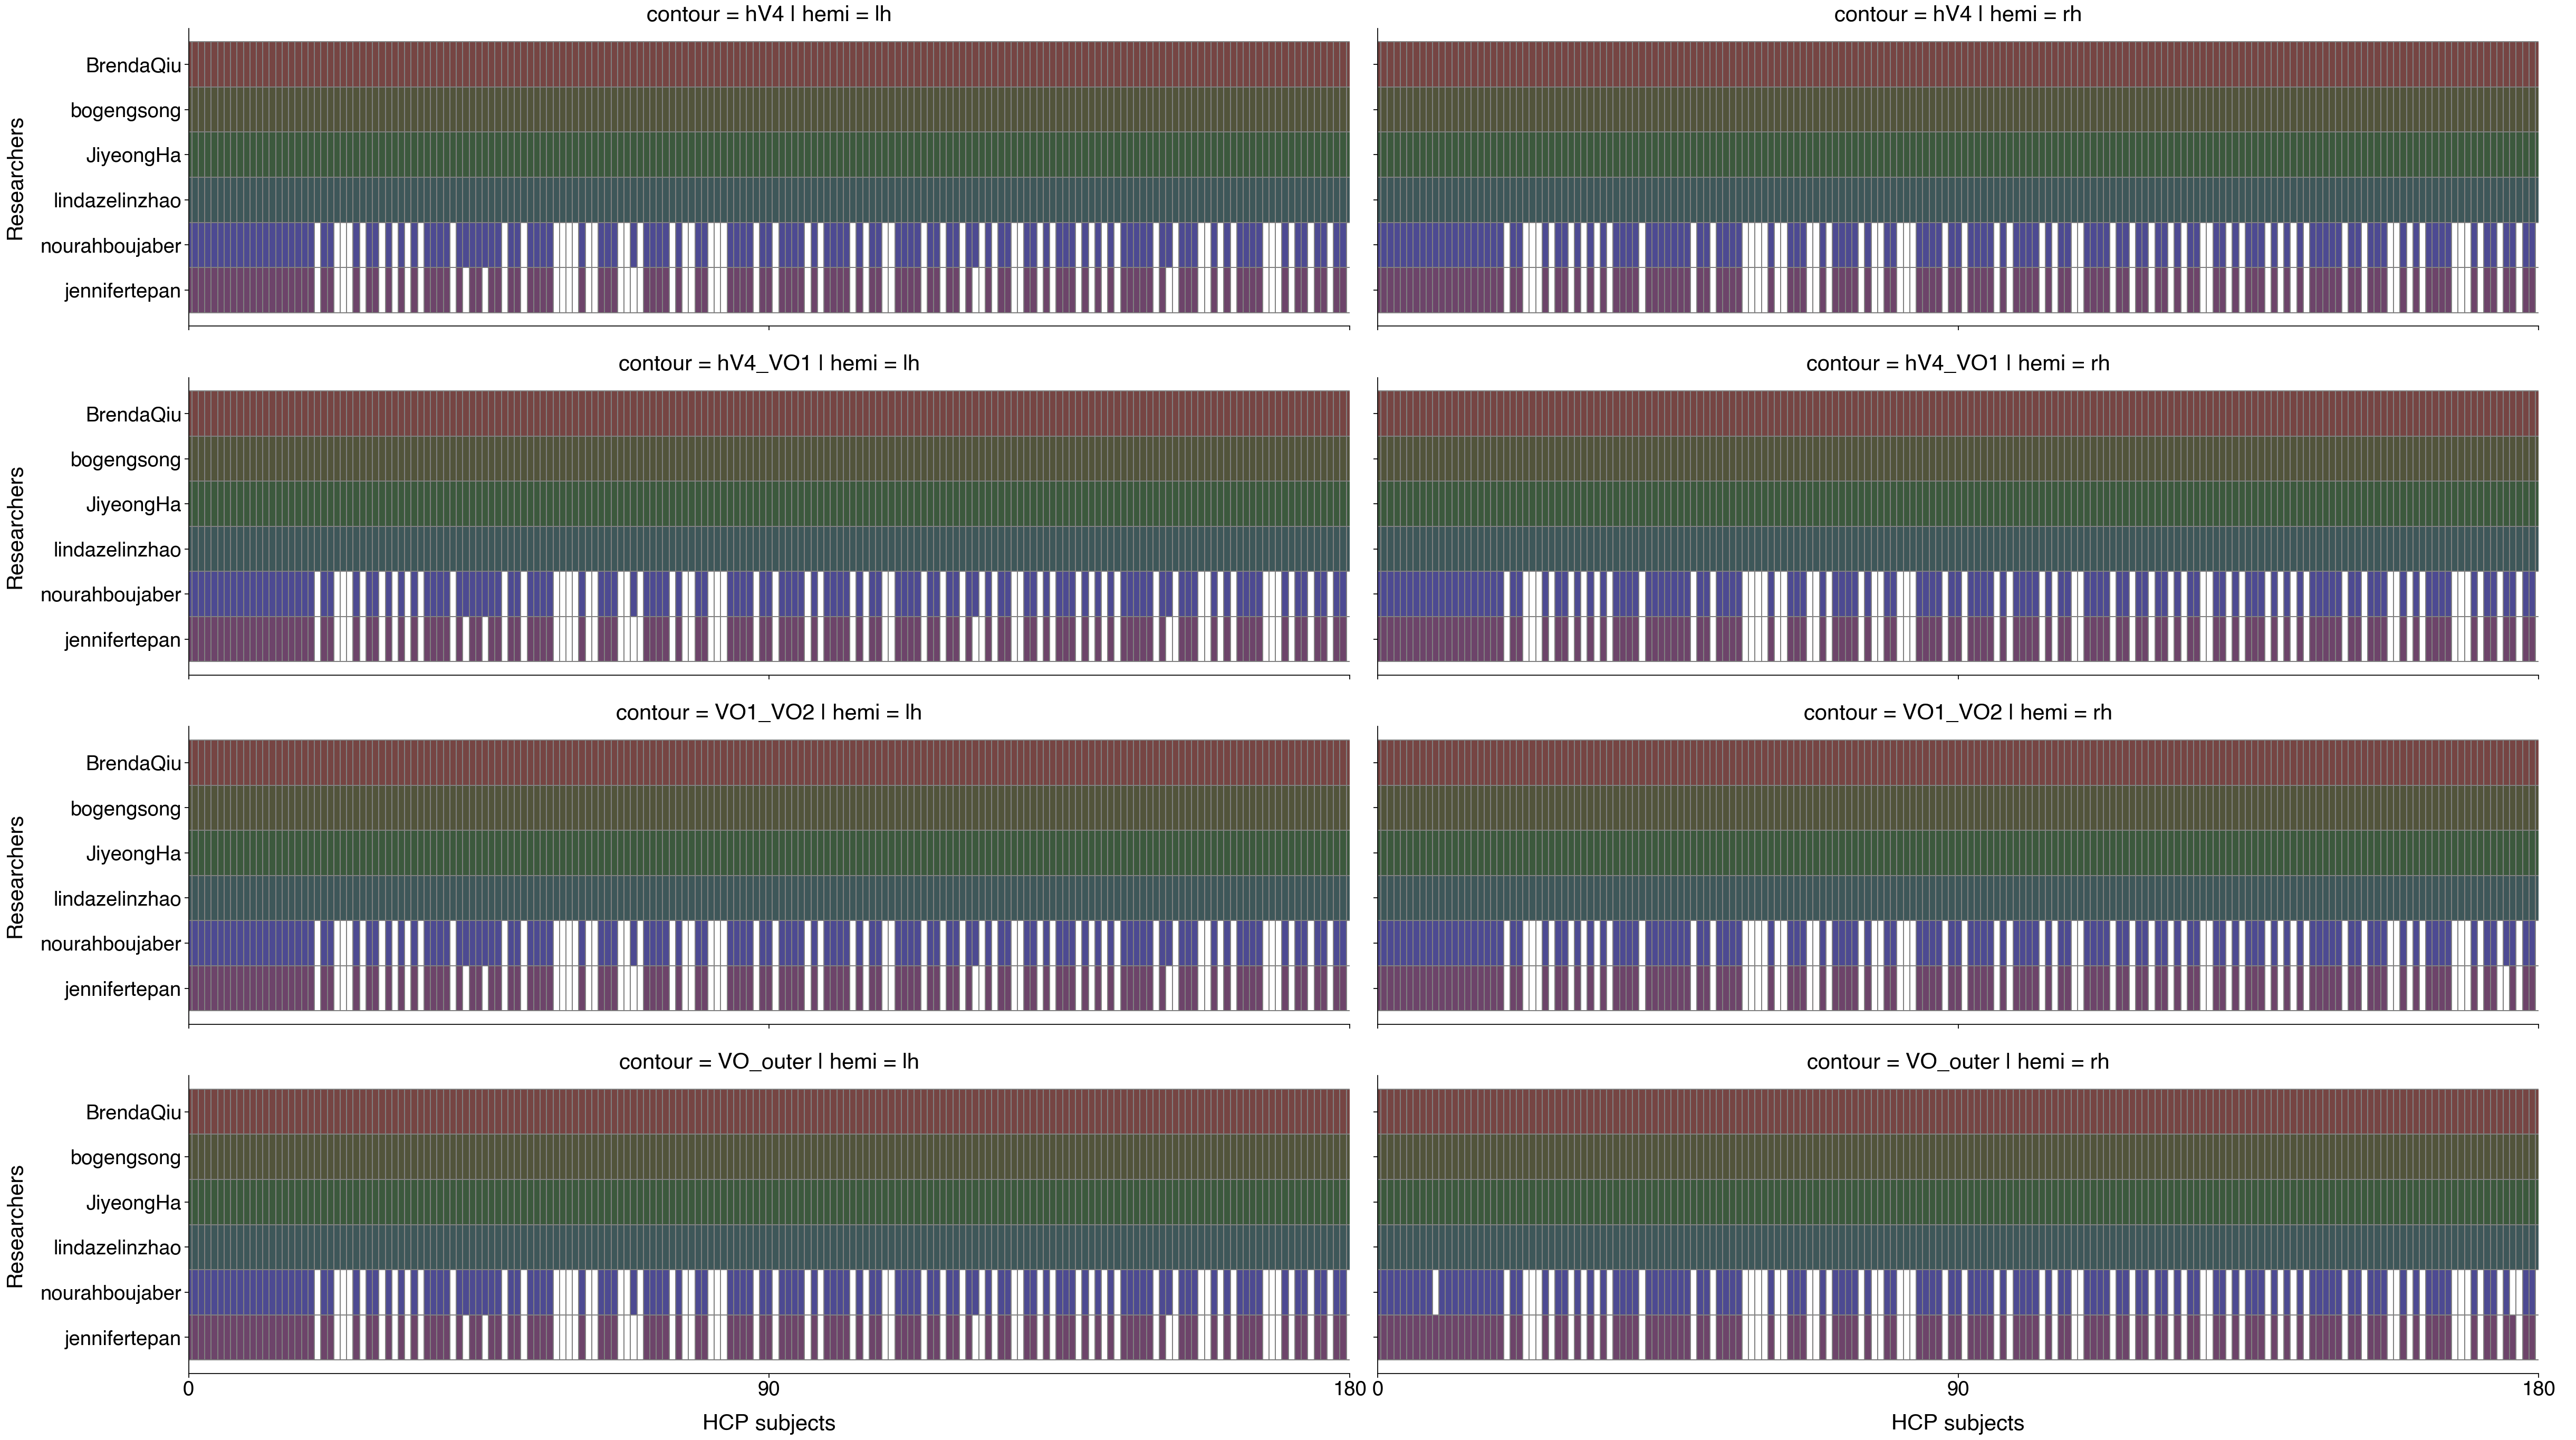

In [8]:
output_path = os.path.join(fig_dir, 'sids_check', 'counts-contours.png')
viscontours.check_sids(df=contours_df,
                       sid='sid', y='researcher',
                       col='hemi', col_order=hemi_list,
                       row='contour', row_order=contour_list,
                       height=7,
                       hue='researcher', hue_order=researcher_list, save_path=output_path)

# Make Path


```
researcher='BrendaQiu'
hemi='lh'
roi='hV4'
sid=100610
n_points=500
filename=os.path.join(proc_path, 'fsaverage', researcher, str(sid), f"{hemi}.roi-{roi}_space-fsaverage_npoints-{n_points}.mgz")
x, y = viscontours.make_fsaverage_coords(researcher,
                                         hemi,
                                         roi,
                                         sid,
                                         n_points,
                                         data_dir=data_path,
                                         proc_dir=proc_path,
                                         save_path=filename,
                                         verbose=True)
```

# Get processed path files

In [10]:
n_points=500
paths_df = pd.DataFrame({})
for hemi, roi, researcher in itertools.product(hemi_list, roi_list, researcher_list):
    tmp_df = pd.DataFrame({})
    path_list = glob(os.path.join(proc_path, 'fsaverage', researcher, f'*/{hemi}.roi-{roi}_space-fsaverage_npoints-{n_points}.mgz'))
    tmp_df['sid'] = [int(k.split('/')[-2]) for k in path_list]
    tmp_df['researcher'] = researcher
    tmp_df['roi'] = roi
    tmp_df['hemi'] = hemi
    paths_df = paths_df.append(tmp_df)

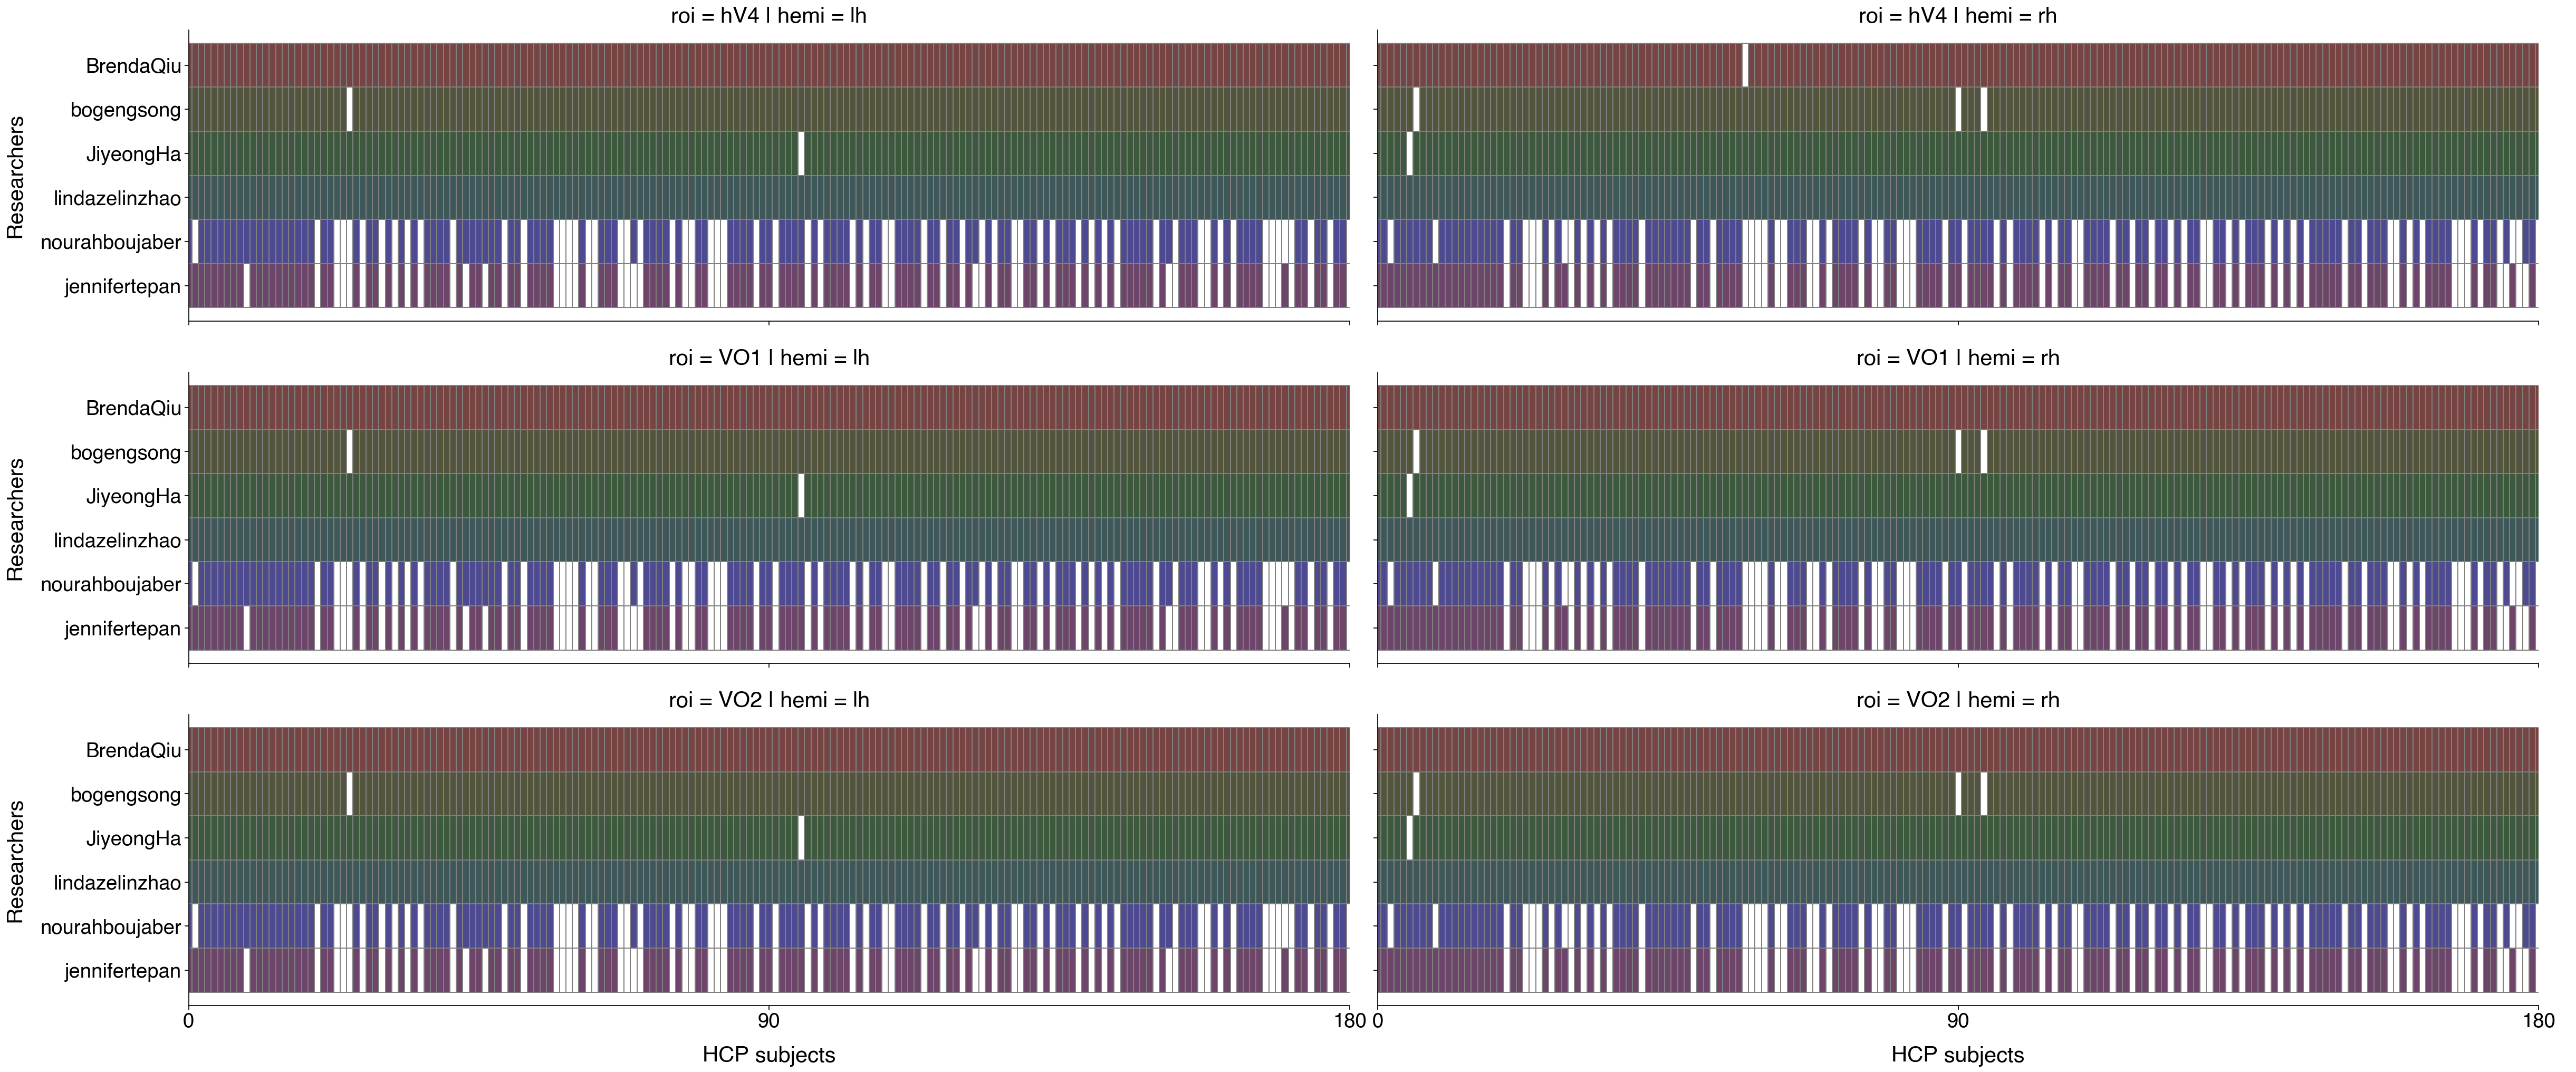

In [11]:
output_path = os.path.join(fig_dir, 'sids_check', 'counts-paths.png')
viscontours.check_sids(df=paths_df,
                       sid='sid', y='researcher',
                       col='hemi', col_order=hemi_list,
                       row='roi', row_order=roi_list,
                       height=7,
                       hue='researcher', hue_order=researcher_list, save_path=output_path)

# Plot averaged ROIs 